#1　はじめに
　本レポートは、問題4に対して検討した。

　因果関係が想像される変数間の関係式を定量的に記述するために、本レポートでは回帰分析を行い、少人数クラスは生徒の学業成績を向上させるかどうか、あるいは人種による相違、在籍年数による違い、長期的な影響などを検討した。

　回帰の結果はあまり有意ではなくが、これは大変なコントロール変数が含まれておらず、他の条件が同じであることをコントロールできなかったためと考えている。また、太郎丸博(2019)の同じデータに対して平均値と標準偏差の分析が、とても参考になった。

　各セクションでは、まず結果を説明するテキストがあり、次にデータを分析するためのコードがある。

　注：

　1.補助教員付きの標準規模クラスの作用はあまり有意ではなく、本文での関心からもはずれるので、しばらく検討しない。

　2.あらかじめ左側のファイルにSTAR.csvを追加しておく必要がある。

#2　回帰分析
　データの基本統計量を得ると、各変数に異常値(外れ値)がなく、全観測数は6325であることがわかる。また、欠損値のない(十分な)観測数は1600で、全観測数の約25%であるが、高校卒業変数(hsgrad)を除くと、欠損値のない観測数は2344で、全観測数の約37%である。

　「STARプロジェクトが実施されている学校から3年生になる前に生徒が転出したり、生徒が途中から転入したりするためにほとんど欠損値が生じる」という推測から、欠損値のパターンにも一定の情報が含まれていると考える。

　欠損値については、本レポートの第3部分で議論している。この部分の回帰分析では、ソフトウェアが提供する欠損値を自動的に処理する方法を用いる。

　ただ独立変数の従属変数への影響を説明しようとして、2つの従属変数を別々に回帰しようとするので、標準化されていない回帰を使用することがより適切であると考える。

In [ ]:
star1 = read.table( file = "STAR.csv", header=T, sep = ",", stringsAsFactors = F )
str(star1)
#基本統計量
summary(star1)

'data.frame':	6325 obs. of  6 variables:
 $ race      : int  1 2 1 2 1 1 1 1 1 1 ...
 $ classtype : int  3 3 3 1 2 3 1 3 1 2 ...
 $ yearssmall: int  0 0 0 4 0 0 4 0 4 0 ...
 $ hsgrad    : int  NA NA 1 NA NA NA NA NA 1 1 ...
 $ g4math    : int  NA 706 711 672 NA NA 668 NA 709 698 ...
 $ g4reading : int  NA 661 750 659 NA NA 657 NA 725 692 ...


      race         classtype       yearssmall         hsgrad     
 Min.   :1.000   Min.   :1.000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:1.000  
 Median :1.000   Median :2.000   Median :0.0000   Median :1.000  
 Mean   :1.341   Mean   :2.052   Mean   :0.9542   Mean   :0.833  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:2.0000   3rd Qu.:1.000  
 Max.   :6.000   Max.   :3.000   Max.   :4.0000   Max.   :1.000  
 NA's   :3                                        NA's   :3278   
     g4math        g4reading    
 Min.   :487.0   Min.   :528.0  
 1st Qu.:688.0   1st Qu.:696.0  
 Median :710.0   Median :723.0  
 Mean   :708.8   Mean   :721.2  
 3rd Qu.:732.5   3rd Qu.:750.0  
 Max.   :821.0   Max.   :836.0  
 NA's   :3930    NA's   :3972   

In [ ]:
#欠損値のない観測数
sum(complete.cases(star1))
mean(complete.cases(star1))
sum(complete.cases(subset(star1,select = -c(hsgrad))))
mean(complete.cases(subset(star1,select = -c(hsgrad))))

[1] 1600

[1] 0.2529644

[1] 2344

[1] 0.3705929

#2.1 スタディデザイン(study design)と回帰分析の考え方
　STARプロジェクトは、初期教育におけるクラス規模が学業成績や人格の発達に与える影特を調査するために4年間かけて行われた縦断的研究である。毎年、生徒たちは少人数
クラス、標準規模クラス、補助教員付き標準規模クラスの3つの介入方法のいずれかにランダムに割り当てられました。介入(interventions)は、生徒が幼稚園に入学するときに開始され、3年生まで続けられました。参加者が高校を卒業するまで様々な測定値が収集され続けた。

　対照群と処理群を表2.1にまとめる。各学年に2つの処理群がある。


In [ ]:
#Table2.1
Experimental_Design=c("Control","Treatment 1","Treatment 2")
Class_type=c("Regular class","Small class","Regular class + aide")
NumberOfStudents_kindergarten=c(sum(star1$classtype==2),sum(star1$classtype==1),sum(star1$classtype==3))
Table2.1=data.frame(Experimental_Design,Class_type,NumberOfStudents_kindergarten)
Table2.1

Experimental_Design,Class_type,NumberOfStudents_kindergarten
<chr>,<chr>,<int>
Control,Regular class,2194
Treatment 1,Small class,1900
Treatment 2,Regular class + aide,2231


#2.2 ４年生時の算数・読解の成績への影響
   ここでは少人数クラス(class.Small)の係数にのみ注目する。

　(1)算数について

　図2.1に見られるように、3つの群のポイント分布やレベルには大きな違いがないことがわかる。

　表2.2に見られるように、幼稚園での標準規模クラスRegularがベースラインなので、他の条件が同じであれば、少人数クラスの生徒の４年生時の算数の平均成績は、0.34ポイント減少することになる。ただし、少人数クラスの係数-0.34は影響が小さくて、統計的に有意ではない。

　また、表2.2に見られるように、分位点回帰の分析結果から、統計的に有意ではないが、算数の成績が低い生徒たちは、少人数クラスのマイナスの影響を受け、平均成績が3.0ポイント減る。算数の成績が高い生徒たちは、少人数クラスのプラスの影響を受け、平均成績が3.0ポイント増える。

　F検定から、幼稚園でのクラスのタイプによる算数の成績の差がないことは分かった。等分散性検定から、p-value = 0.039なので有意差ありなので、算数の成績の等分散性は棄却される。

　(2)読解について

　図2.1に見られるように、3つの群のポイント分布やレベルには大きな違いがないことがわかる。

　表2.2に見られるように、幼稚園での標準規模クラスRegularがベースラインなので、他の条件が同じであれば、少人数クラスの生徒の４年生時の読解の平均成績は、3.50ポイント増加することになる。ただし、少人数クラスの係数3.50は統計的に有意ではない。

　また、表2.2に見られるように、分位点回帰の分析結果から、統計的に有意ではないが、読解の成績が低い生徒たちは、少人数クラスのプラスの影響を受け、平均成績が2.0ポイント増える。読解の成績が高い生徒たちは、少人数クラスのプラスの影響を受け、平均成績が4.0ポイント増える。

　F検定から、幼稚園でのクラスのタイプによる読解の成績の差がないことは分かった。等分散性検定から、p-value = 0.689なので読解の成績の分散は等しくないとはいえないという結論が導かれる。

In [ ]:
#ダミー変数準備。変数の頭文字は対照群を変えるためにつけられている。
star1$class.[star1$classtype == 2] <- "Regular" 
star1$class.[star1$classtype == 1] <- "Small" 
star1$class.[star1$classtype == 3] <- "TRegAide" 
table(star1$race)
star1$race.[star1$race == 1] <- "White" 
star1$race.[star1$race >1]<- "XMinority"
head(star1,2)


   1    2    3    4    5    6 
4234 2058   14    5    2    9 

,race,classtype,yearssmall,hsgrad,g4math,g4reading,class.,race.
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,1,3,0,NA,NA,NA,TRegAide,White
2,2,3,0,NA,706,661,TRegAide,XMinority


Warning message:
“Removed 3930 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3930 rows containing missing values (geom_point).”
Warning message:
“Removed 3972 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3972 rows containing missing values (geom_point).”


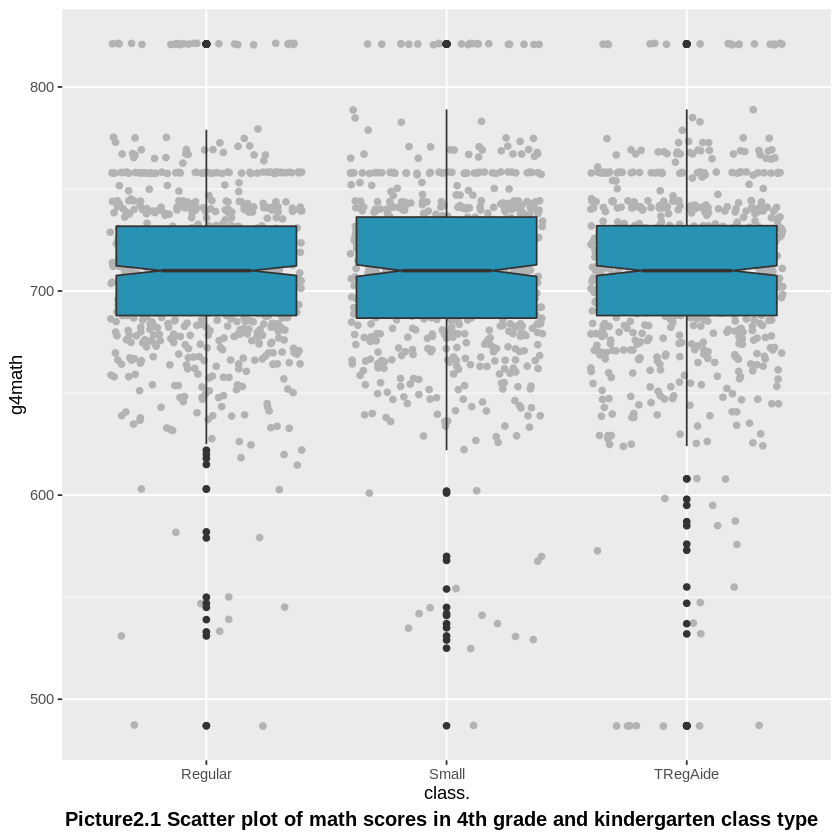

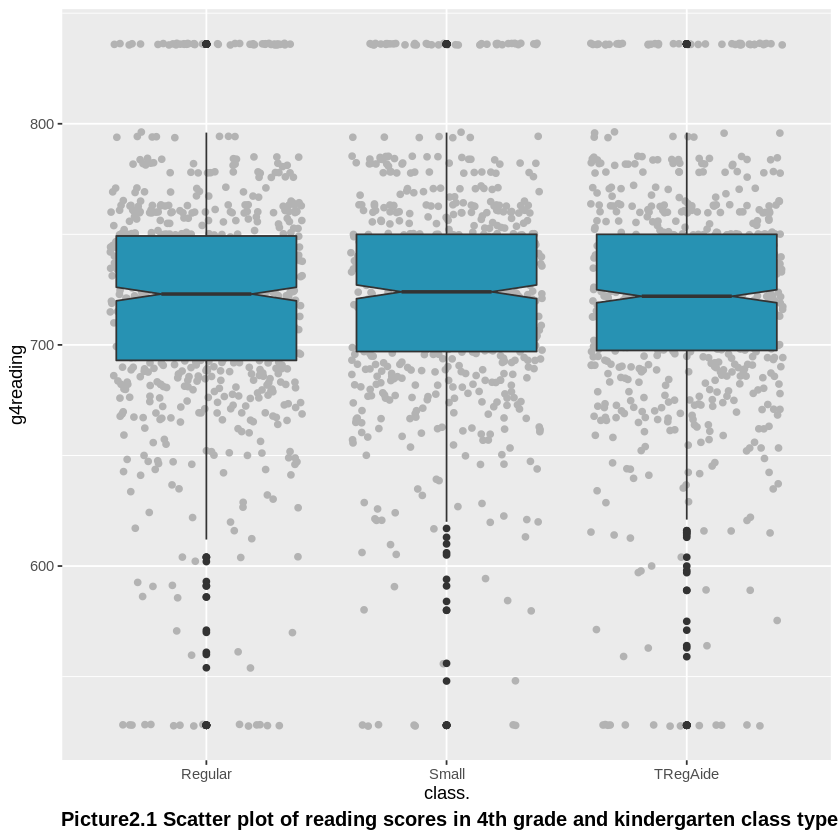

In [ ]:
#Picture2.1 math
library( ggplot2 )
ggplot(star1,aes(x=class.,y=g4math))+geom_point(position="jitter",color="gray70")+
geom_boxplot(fill="#2792b3",notch=T)+
labs(caption= "Picture2.1 Scatter plot of math scores in 4th grade and kindergarten class type")+
theme(plot.caption = element_text(hjust = 0.2,size = 12, face = "bold"))
#Picture2.1 reading
ggplot(star1,aes(x=class.,y=g4reading))+geom_point(position="jitter",color="gray70")+
geom_boxplot(fill="#2792b3",notch=T)+
labs(caption= "Picture2.1 Scatter plot of reading scores in 4th grade and kindergarten class type")+
theme(plot.caption = element_text(hjust = 0.2,size = 12, face = "bold"))


In [ ]:
install.packages("quantreg") 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
mathLM1 <- lm(g4math~class., data=star1)
summary(mathLM1)
readLM1 <- lm(g4reading~class., data=star1)
summary(readLM1)
#分位点回帰 5分位で分割し
library("quantreg") 
mathfit1 = rq(g4math~class., tau =0.20, data = star1) 
mathfit2 = rq(g4math~class., tau =0.80, data = star1) 
readfit1 = rq(g4reading~class., tau =0.20, data = star1) 
readfit2 = rq(g4reading~class., tau =0.80, data = star1) 


Call:
lm(formula = g4math ~ class., data = star1)

Residuals:
     Min       1Q   Median       3Q      Max 
-222.521  -21.521    1.479   24.367  113.367 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    709.5214     1.4854 477.664   <2e-16 ***
class.Small     -0.3362     2.1719  -0.155    0.877    
class.TRegAide  -1.8879     2.1193  -0.891    0.373    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.1 on 2392 degrees of freedom
  (3930 observations deleted due to missingness)
Multiple R-squared:  0.0003718,	Adjusted R-squared:  -0.000464 
F-statistic: 0.4449 on 2 and 2392 DF,  p-value: 0.641



Call:
lm(formula = g4reading ~ class., data = star1)

Residuals:
     Min       1Q   Median       3Q      Max 
-195.391  -25.716    1.609   29.284  116.110 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    719.8900     1.8132 397.018   <2e-16 ***
class.Small      3.5012     2.6597   1.316    0.188    
class.TRegAide   0.8256     2.6005   0.317    0.751    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.43 on 2350 degrees of freedom
  (3972 observations deleted due to missingness)
Multiple R-squared:  0.0007891,	Adjusted R-squared:  -6.134e-05 
F-statistic: 0.9279 on 2 and 2350 DF,  p-value: 0.3955


Warning message in rq.fit.br(x, y, tau = tau, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ...):
“Solution may be nonunique”


In [ ]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(stargazer)
stargazer(mathLM1,mathfit1,mathfit2,readLM1,readfit1,readfit2,
  title = "Table2.2  Project STAR: Differences Estimates",
  header = FALSE, 
  type = "text",
  model.numbers = F,
  omit.table.layout = "n",
  column.labels = c("Main Effects(math)","the first quintile(math)","the top quintile(math)","Main Effects(reading)","the first quintile(reading)","the top quintile(reading)"),
  dep.var.caption  = " Dependent Variable: g4math 20%math 80%math g4reading 20%reading 80%reading",
  dep.var.labels.include = FALSE)


Table2.2 Project STAR: Differences Estimates
                                                       Dependent Variable: g4math 20%math 80%math g4reading 20%reading 80%reading                                   
                    ------------------------------------------------------------------------------------------------------------------------------------------------
                            OLS                             quantile                              OLS                                quantile                       
                                                           regression                                                               regression                      
                     Main Effects(math)  the first quintile(math) the top quintile(math) Main Effects(reading) the first quintile(reading) the top quintile(reading)
---------------------------------------------------------------------------------------------------------------------------------

In [ ]:
mathAOV1 <- aov(g4math~class., data=star1)
summary(mathAOV1)
#多群のデータの等分散性検定  p-value = 0.039なので有意差ありなので、等分散性は棄却される。 
bartlett.test(g4math~class.,data=star1)

readAOV1 <- aov(g4reading~class., data=star1)
summary(readAOV1)
#多群のデータの等分散性検定   p-value = 0.689なので各群の母分散は等しくないとはいえないという結論が導かれる。
bartlett.test(g4reading~class.,data=star1)


              Df  Sum Sq Mean Sq F value Pr(>F)
class.         2    1653   826.5   0.445  0.641
Residuals   2392 4443851  1857.8               
3930 observations deleted due to missingness


	Bartlett test of homogeneity of variances

data:  g4math by class.
Bartlett's K-squared = 6.4871, df = 2, p-value = 0.03903


              Df  Sum Sq Mean Sq F value Pr(>F)
class.         2    5101    2550   0.928  0.396
Residuals   2350 6459318    2749               
3972 observations deleted due to missingness


	Bartlett test of homogeneity of variances

data:  g4reading by class.
Bartlett's K-squared = 0.74444, df = 2, p-value = 0.6892


#2.3 少人数クラスの人種間の学力差への影響
　ここでは少人数クラスと人種の交互作用(class.Small:race.XMinority)の係数にのみ注目する。

(1)算数について

　図2.2に見られるように、少人数クラス群には、人種間格差がもっと大きいであることがわかる。

　表2.3に見られるように、人種の係数がマイナスであり、少人数クラスと人種の交互作用(class.Small:race.XMinority)の係数もマイナスである。この意味は、少人数クラスでも白人とマイノリティの算数の平均成績差は縮小しない。ただし、係数-0.041は影響が小さくて、統計的に有意ではない。

　図2.3に見られるように、数学は少人数クラスでも人種間格差が縮小しない。(線間の距離の変化を比較する)。

　(2)読解について

　図2.2に見られるように、少人数クラス群には、人種間格差がもっと小さいであることがわかる。

　表2.3に見られるように、人種の係数がマイナスであり、少人数クラスと人種の交互作用(class.Small:race.XMinority)の係数がプラスである。この意味は、少人数クラスで
白人とマイノリティの読解の平均成績差は縮小している。ただし、係数6.767は影響が大きいが、統計的に有意ではない。

　図2.3に見られるように、読解のほうは少人数クラスで人種間格差が縮小している(線間の距離の変化を比較する)。

Warning message:
“Removed 3930 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3930 rows containing missing values (geom_point).”
Warning message:
“Removed 3972 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3972 rows containing missing values (geom_point).”


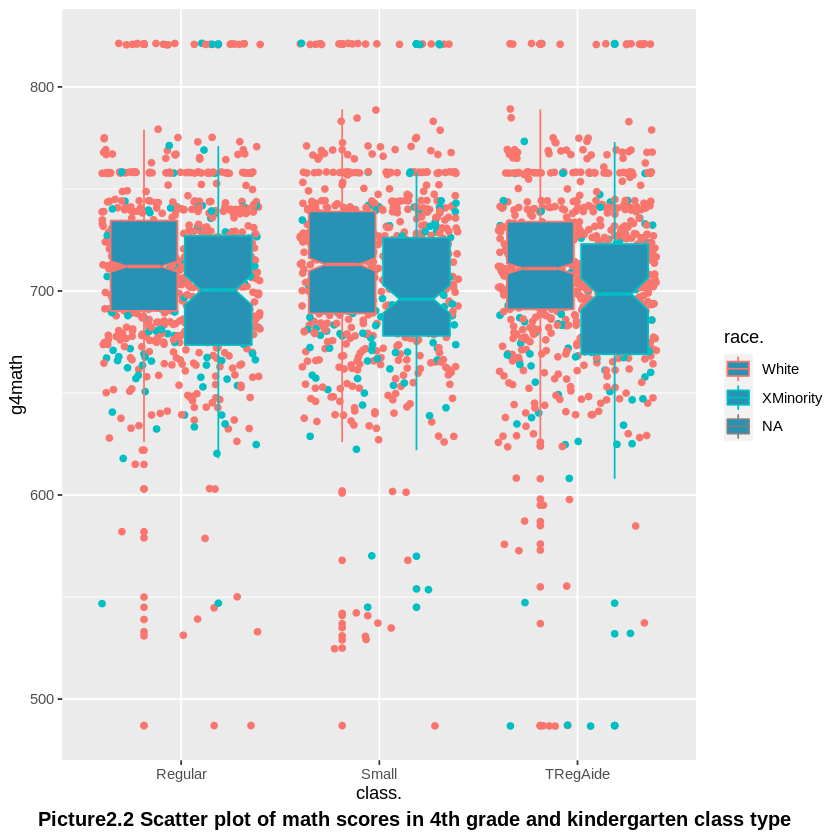

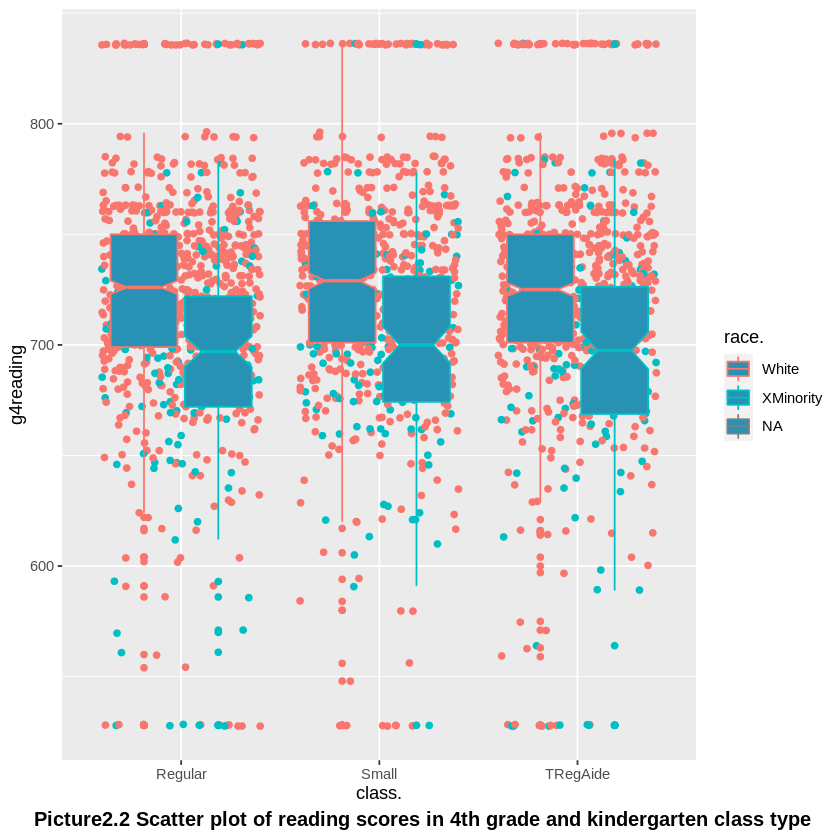

In [ ]:
#Picture2.2 math
library( ggplot2 )
ggplot(star1,aes(x=class.,y=g4math,color=race.))+geom_point(position="jitter")+
geom_boxplot(fill="#2792b3",notch=T)+
labs(caption= "Picture2.2 Scatter plot of math scores in 4th grade and kindergarten class type")+
theme(plot.caption = element_text(hjust = 0.2,size = 12, face = "bold"))
#Picture2.2 reading
ggplot(star1,aes(x=class.,y=g4reading,color=race.))+geom_point(position="jitter")+
geom_boxplot(fill="#2792b3",notch=T)+
labs(caption= "Picture2.2 Scatter plot of reading scores in 4th grade and kindergarten class type")+
theme(plot.caption = element_text(hjust = 0.2,size = 12, face = "bold"))

In [ ]:
table(star1$race.)
mathLM2 <- lm(g4math~class.+race., data=star1)
mathLM3 <- lm(g4math~class.+race.+class.:race., data=star1)
tapply(star1$g4math,star1$race.,summary)

readLM2 <- lm(g4reading~class.+race., data=star1)
readLM3 <- lm(g4reading~class.+race.+class.:race., data=star1)
#tapply(star1$g4reading,star1$race.,summary)


    White XMinority 
     4234      2088 

$White
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    487     690     712     711     736     821    2202 

$XMinority
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  487.0   672.0   697.0   696.2   725.0   821.0    1725 


In [ ]:
#Table2.3 
library(stargazer)
stargazer(mathLM2,mathLM3,readLM2,readLM3,
  title = "Table2.3  Project STAR: Differences Estimates",
  header = FALSE, 
  type = "text",
  model.numbers = F,
  omit.table.layout = "n",
  column.labels = c("Main Effects(math)","race(math)","Main Effects(reading)","race(math)"),
  dep.var.caption  = " Dependent Variable: g4math g4math g4reading g4reading",
  dep.var.labels.include = FALSE)


Table2.3 Project STAR: Differences Estimates
                                                    Dependent Variable: g4math g4math g4reading g4reading                       
                              --------------------------------------------------------------------------------------------------
                                 Main Effects(math)          race(math)         Main Effects(reading)          race(math)       
--------------------------------------------------------------------------------------------------------------------------------
class.Small                            -0.205                  -0.220                   3.801                    2.723          
                                      (2.156)                  (2.347)                 (2.596)                  (2.830)         
                                                                                                                                
class.TRegAide                         -2.027      

In [ ]:
install.packages("effects")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



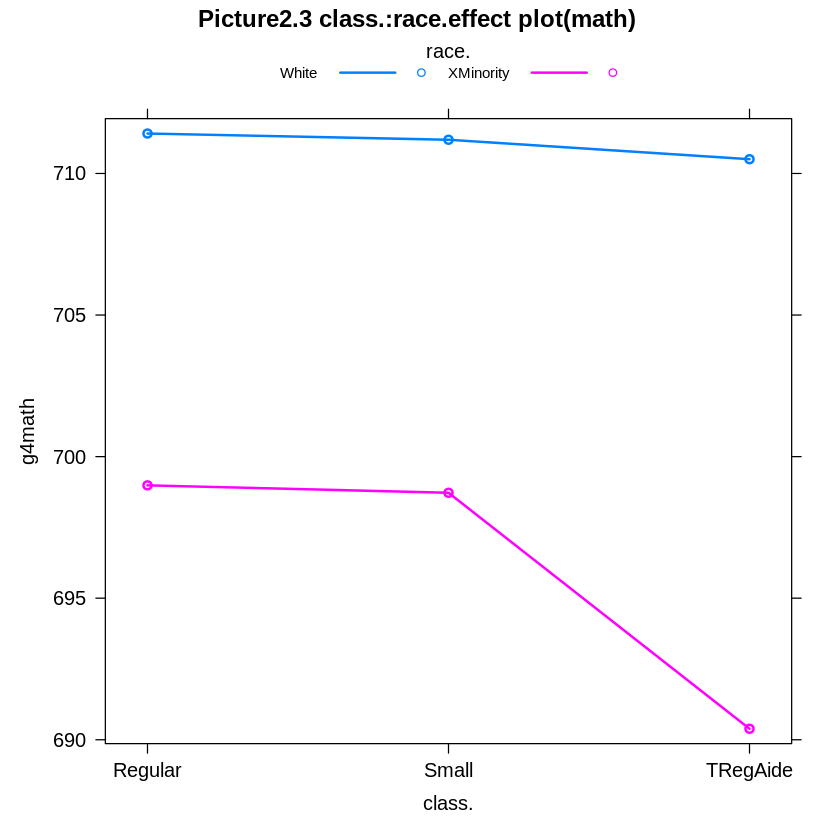

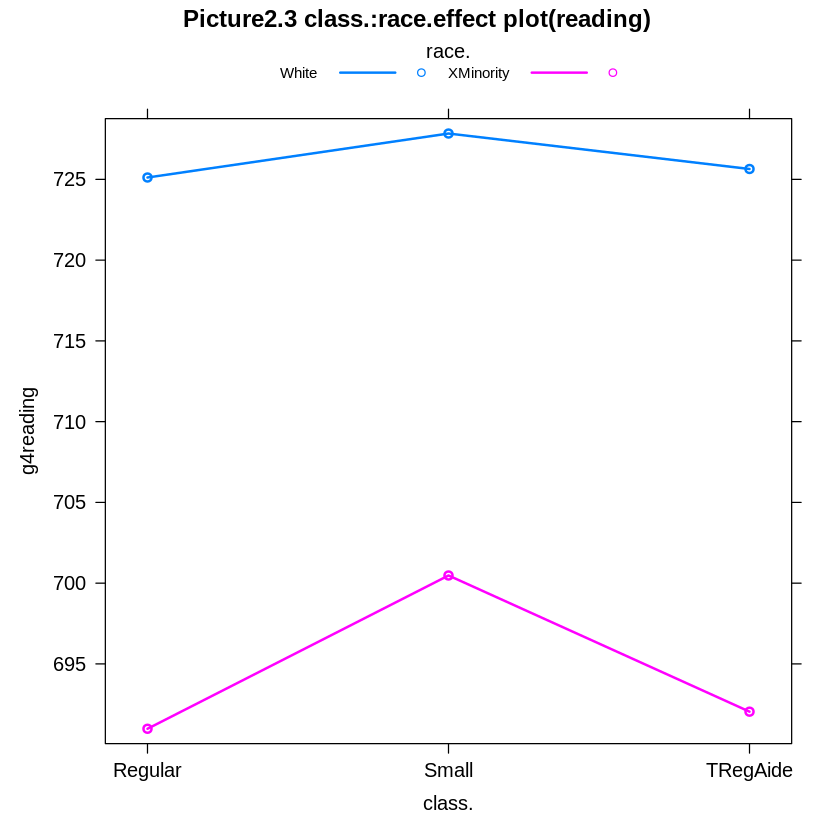

In [ ]:
#Picture2.3 math
library(effects)
plot(effect( "class.:race.",mathLM3),multiline = T ,main="Picture2.3 class.:race.effect plot(math) ")
#Picture2.3 reading
plot(effect( "class.:race.",readLM3),multiline = T,main="Picture2.3 class.:race.effect plot(reading) " )

#2.4 少人数クラス在籍年数別の４年生時の算数・読解の成績への影響
　このモデル設定が間違っている可能性があると考える。

　ここでは少人数クラスでの在籍年数(yearssmall)の係数と、少人数クラスと在籍年数の交互作用(class.Small:yearssmall)の係数に注目する。

(1)算数について

　図2.4に見られるように、はっきりした傾向ではないが、少人数クラス群での在籍年数が1である群の分布は他よりも集中していることがわかる。

　表2.4に見られるように、在籍年数の係数がプラスであり、少人数クラスと在籍年数の交互作用(class.Small:yearssmall)の係数もプラスである。この意味は、幼稚園のとき少人数クラスでも在籍年数による算数の平均成績差は縮小しない。ただし、係数0.007は影響が非常に小さくて、統計的に有意ではない。

　図2.5に見られるように、算数は少人数クラスでも在籍年数間による格差が縮小しない(線間の距離の変化を比較する)。

　(2)読解について

　図2.4に見られるように、はっきりした傾向ではないが、少人数クラス群での在籍年数が1と3である群の分布は他よりも集中していることがわかる。

　表2.4に見られるように、在籍年数の係数がマイナスであり、少人数クラスと在籍年数の交互作用(class.Small:yearssmall)の係数がプラスである。この意味は、幼稚園のとき少人数クラスで在籍年数による読解の平均成績差は縮小している。ただし、係数-0.815は影響が小さくて、統計的に有意ではない。

　図2.5に見られるように、読解は少人数クラスで在籍年数間による格差が縮小しいる(線間の距離の変化を比較する)。
　

Warning message:
“Removed 3930 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3930 rows containing missing values (geom_point).”
notch went outside hinges. Try setting notch=FALSE.

Warning message:
“Removed 3972 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3972 rows containing missing values (geom_point).”


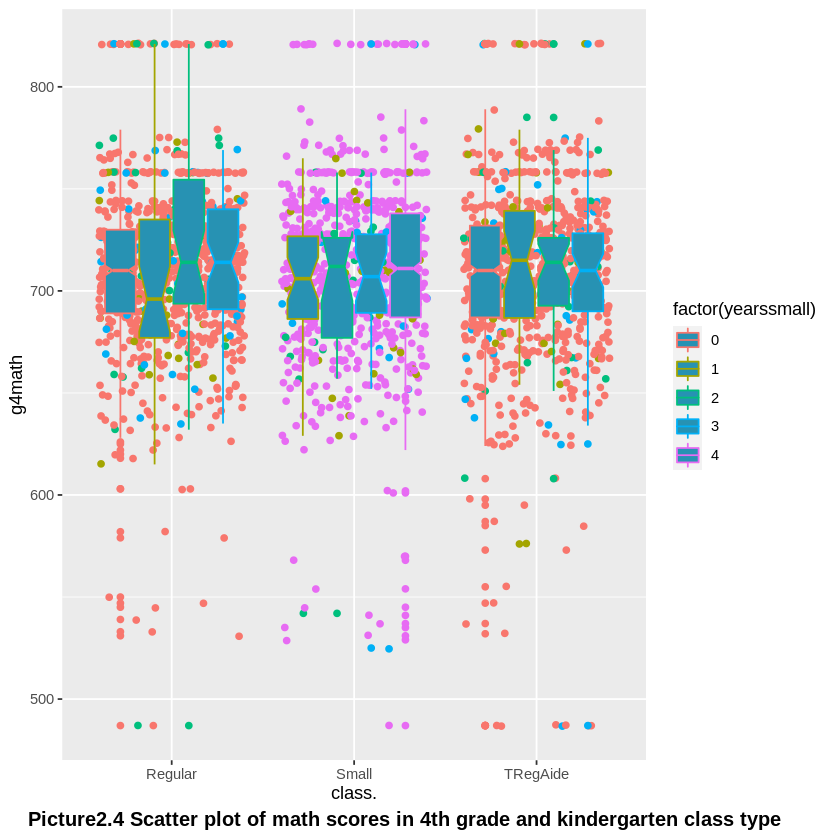

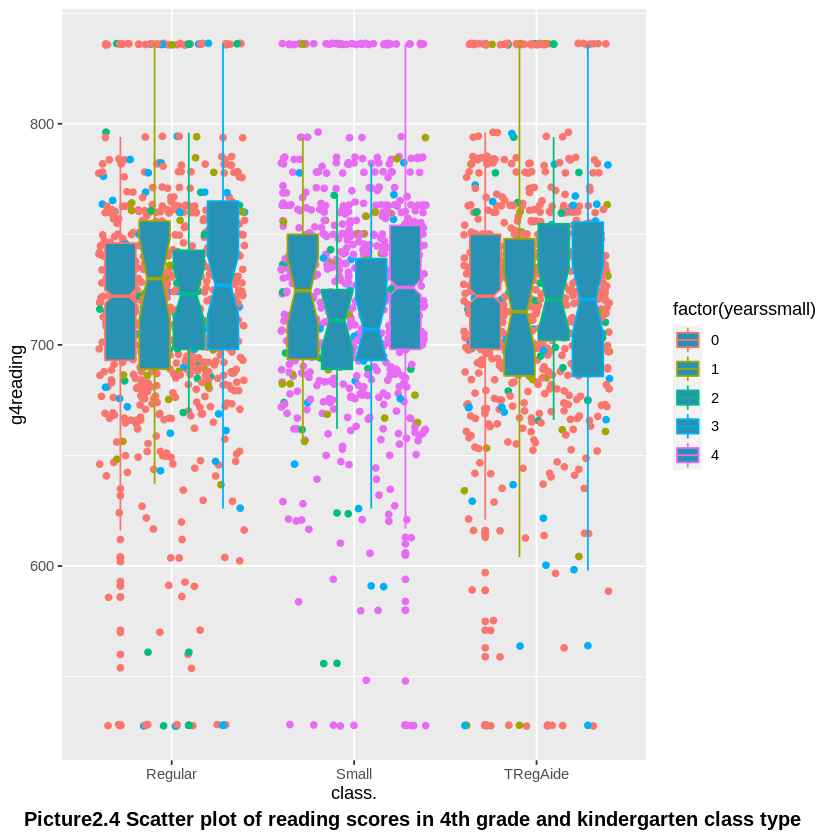

In [ ]:
#Picture2.4 math
library( ggplot2 )
ggplot(star1,aes(x=class.,y=g4math,color=factor(yearssmall)))+geom_point(position="jitter")+
geom_boxplot(fill="#2792b3",notch=T)+
labs(caption= "Picture2.4 Scatter plot of math scores in 4th grade and kindergarten class type")+
theme(plot.caption = element_text(hjust = 0.2,size = 12, face = "bold"))
#Picture2.4 reading
ggplot(star1,aes(x=class.,y=g4reading,color=factor(yearssmall)))+geom_point(position="jitter")+
geom_boxplot(fill="#2792b3",notch=T)+
labs(caption= "Picture2.4 Scatter plot of reading scores in 4th grade and kindergarten class type")+
theme(plot.caption = element_text(hjust = 0.2,size = 12, face = "bold"))

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
table(star1$class., star1$yearssmall)
#tapply(star1$g4reading,star1$yearssmall,summary)
mathLM4 <- lm(g4math~class.+race.+yearssmall, data=star1)
mathLM5 <- lm(g4math~class.+race.+yearssmall+class.:yearssmall, data=star1)
readLM4 <- lm(g4reading~class.+race.+yearssmall, data=star1)
readLM5 <- lm(g4reading~class.+race.+yearssmall+class.:yearssmall, data=star1)

library( car )
car::vif(mathLM4 )

          
              0    1    2    3    4
  Regular  1961   95   58   80    0
  Small       0  576  272  195  857
  TRegAide 1996   97   60   78    0

,GVIF,Df,GVIF^(1/(2*Df))
class.,4.712796,2,1.473397
race.,1.001411,1,1.000705
yearssmall,4.715055,1,2.171418


In [ ]:
#Table2.4
library(stargazer)
stargazer(mathLM4,mathLM5,readLM4,readLM5,
  title = "Table2.4 Project STAR: Differences Estimates",
  header = FALSE, 
  type = "text",
  model.numbers = F,
  omit.table.layout = "n",
  column.labels = c("Main Effects(math)","Yearssmall(math)","Main Effects(reading)","Yearssmall(reading)"),
  dep.var.caption  = " Dependent Variable: g4math g4math g4reading g4reading",
  dep.var.labels.include = FALSE)


Table2.4 Project STAR: Differences Estimates
                                                Dependent Variable: g4math g4math g4reading g4reading                       
                          --------------------------------------------------------------------------------------------------
                             Main Effects(math)       Yearssmall(math)      Main Effects(reading)     Yearssmall(reading)   
----------------------------------------------------------------------------------------------------------------------------
class.Small                       -7.474*                  -9.557                   -3.358                   -4.404         
                                  (4.222)                  (8.266)                 (5.128)                  (10.077)        
                                                                                                                            
class.TRegAide                     -1.982                  -1.412              

,class.,yearssmall,fit,se,lower,upper
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Regular,0,708.5788,1.587342,705.4661,711.6915
2,Small,0,699.0221,8.111882,683.1150,714.9292


,class.,yearssmall,fit,se,lower,upper
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Regular,0,718.7287,1.904520,714.9940,722.4634
2,Small,0,714.3249,9.894776,694.9215,733.7284


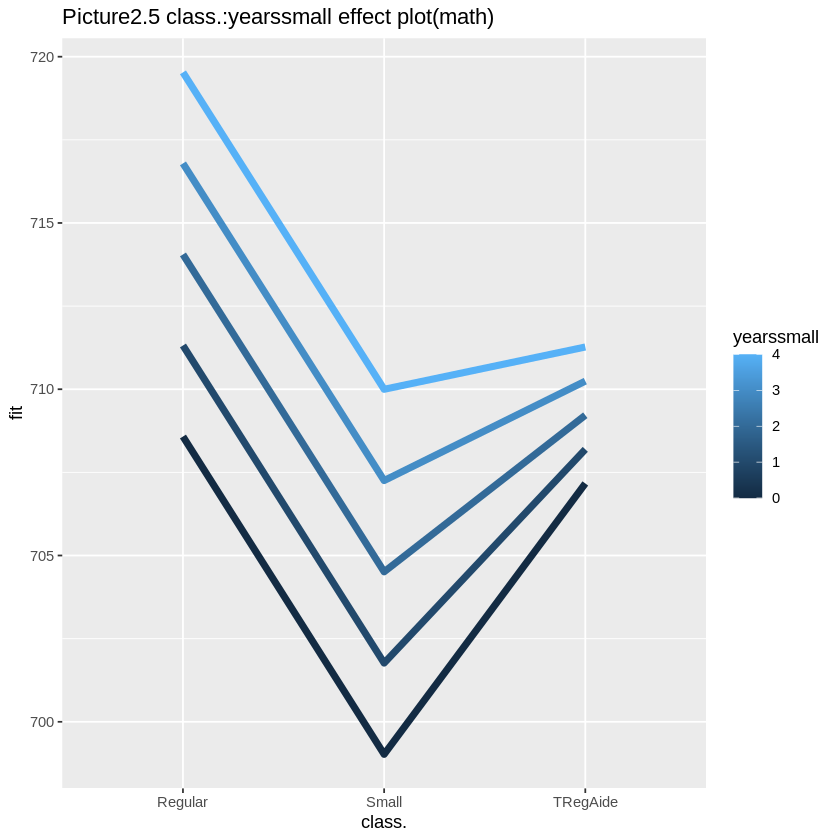

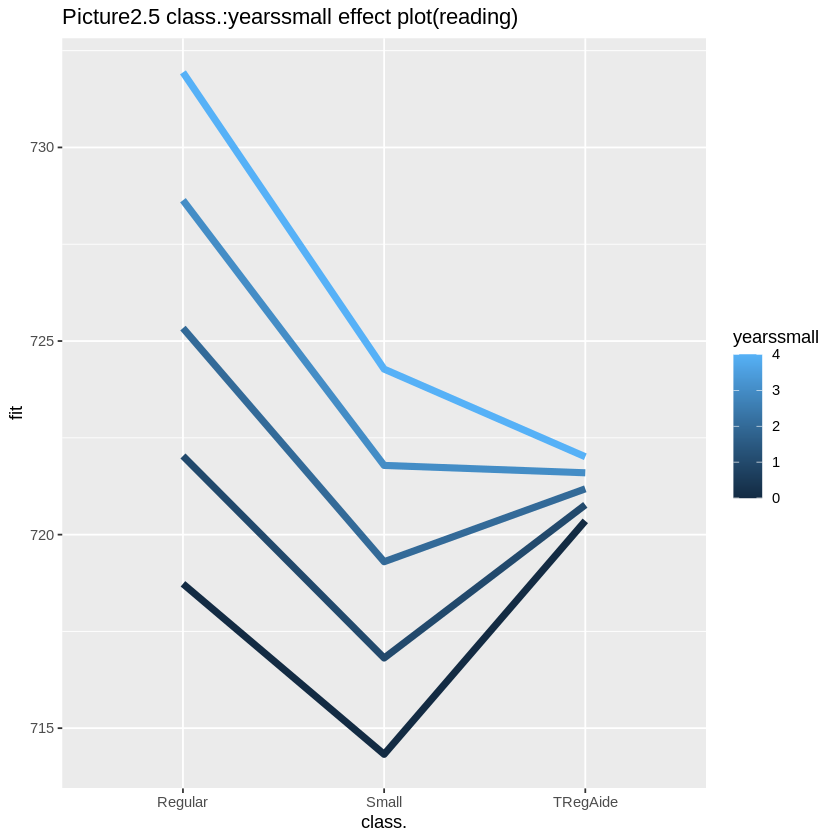

In [ ]:
#Picture2.5 math
library(effects)
math1=as.data.frame(effect( "class.:yearssmall",mathLM5))
head(math1,2)
library(ggplot2)
ggplot(data=math1, aes(x=class.,y=fit, group=yearssmall	))+
geom_line(size=2, aes(color=yearssmall))+
ggtitle("Picture2.5 class.:yearssmall effect plot(math) ")
#Picture2.5 reading
read1=as.data.frame(effect( "class.:yearssmall",readLM5))
head(read1,2)
library(ggplot2)
ggplot(data=read1, aes(x=class.,y=fit, group=yearssmall	))+
geom_line(size=2, aes(color=yearssmall))+
ggtitle("Picture2.5 class.:yearssmall effect plot(reading) ")

#2.5 少人数クラスの長期的な学業（高校卒業）への影響

　ロジスティック回帰を使って、ここでは少人数クラス(class.Small)の係数にのみ注目する。

　表2.5に見られるように、幼稚園での標準規模クラスRegularがベースラインなので、他の条件が同じであれば、少人数クラスの生徒の高校卒業確率がexp(0.073)倍上がることになる。ただし、少人数クラスの係数0.073は影響が小さくて、統計的に有意ではない。すなわち、幼稚園で少人数クラスに所属したことが高校卒業率を高める効果はみとめられず。

In [ ]:
#long-term effect
table(star1$hsgrad,star1$class.)
tapply(star1$hsgrad,star1$class.,summary)
gradLM1=glm(hsgrad~class.,data=star1,family = binomial)
gradLM2=glm(hsgrad~class.+race.,data=star1,family = binomial)

   
    Regular Small TRegAide
  0     189   148      171
  1     892   754      893

$Regular
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  1.0000  1.0000  0.8252  1.0000  1.0000    1113 

$Small
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  1.0000  1.0000  0.8359  1.0000  1.0000     998 

$TRegAide
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  1.0000  1.0000  0.8393  1.0000  1.0000    1167 


In [ ]:
#Table2.5
library(stargazer)
stargazer(gradLM1,gradLM2,
  title = "Table2.5  Project STAR: long-term effect",
  header = FALSE, 
  type = "text",
  model.numbers = F,
  omit.table.layout = "n",
  column.labels = c("Main Effects","race"),
  dep.var.caption  = " Dependent Variable: hsgrad hsgrad",
  dep.var.labels.include = FALSE)
  AIC(gradLM1)
  AIC(gradLM2)


Table2.5 Project STAR: long-term effect
                  Dependent Variable: hsgrad hsgrad 
                  ----------------------------------
                     Main Effects         race      
----------------------------------------------------
class.Small             0.076             0.073     
                       (0.120)           (0.122)    
                                                    
class.TRegAide          0.101             0.113     
                       (0.116)           (0.117)    
                                                    
race.XMinority                          -0.830***   
                                         (0.101)    
                                                    
Constant               1.552***         1.820***    
                       (0.080)           (0.090)    
                                                    
----------------------------------------------------
Observations            3,047             3,047     
Log L

[1] 2751.426

[1] 2688.393

#3 欠損値について

　「STARプロジェクトが実施されている学校から3年生になる前に生徒が転出したり、生徒が途中から転入したりするためにほとんど欠損値が生じる」という推測から、欠損値のパターンにも一定の情報が含まれていると考える。

　本レポートは、4年生時の成績の欠損が教育環境の不安定さを反映していると粗雑に主考えている。この強力な設定に基づいて、4年生時の成績が欠損した時、instable変数は1で不安定を表し、そうでない場合は0になる。その後、ロジスティック回帰分析を行う。

　残念ながら、表3.1に見られるように、幼稚園で少人数クラスに所属したことが教育環境の不安定さを減少する効果はみとめられず。

In [ ]:
#Instability　　instable＝1は教育環境の不安定を表す。
star1$instable=factor(ifelse(complete.cases(subset(star1,select = -c(hsgrad))),0,1))
head(star1,3)
table(star1$instable,star1$class.)
instLM1=glm(instable~class.,data=star1,family = binomial)
instLM2=glm(instable~class.+race.,data=star1,family = binomial)

,race,classtype,yearssmall,hsgrad,g4math,g4reading,class.,race.,instable
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<fct>
1,1,3,0,NA,NA,NA,TRegAide,White,1
2,2,3,0,NA,706,661,TRegAide,XMinority,0
3,1,3,0,1,711,750,TRegAide,White,0


   
    Regular Small TRegAide
  0     833   722      789
  1    1361  1178     1442

In [ ]:
#Table3.1
library(stargazer)
stargazer(instLM1,instLM2,
  title = "Table3.1  Project STAR: Instability",
  header = FALSE, 
  type = "text",
  model.numbers = F,
  omit.table.layout = "n",
  column.labels = c("Main Effects","race"),
  dep.var.caption  = " Dependent Variable: instable",
  dep.var.labels.include = FALSE)


Table3.1 Project STAR: Instability
                  Dependent Variable: instable 
                  -----------------------------
                   Main Effects       race     
-----------------------------------------------
class.Small           -0.001          0.013    
                      (0.065)        (0.067)   
                                               
class.TRegAide        0.112*          0.105    
                      (0.062)        (0.065)   
                                               
race.XMinority                      1.437***   
                                     (0.066)   
                                               
Constant             0.491***        0.086*    
                      (0.044)        (0.048)   
                                               
-----------------------------------------------
Observations           6,325          6,322    
Log Likelihood      -4,167.759     -3,886.177  
Akaike Inf. Crit.    8,341.518      7,780.354  


#参考文献
　Mosteller F.(1995)"The Tennessee study of class size in the early school grades." *Future Child*. Summer-Fall;5(2),pp.113-27. 

https://www.degruyter.com/document/doi/10.1515/9781400851607.261/html

　太郎丸博(2019)Exersize 2.8.1: Class Size Effect in the Early School Grades.
　
http://tarohmaru.web.fc2.com/QssExercises/exercise2.8.1.html